In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./ToN_IoT.zip")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
output = 'type'

In [5]:
df[output].unique()

array(['ransomware', 'ddos', 'injection', 'normal', 'password',
       'backdoor', 'dos', 'xss', 'scanning', 'mitm'], dtype=object)

In [6]:
df[output].value_counts()

type
normal        34955
backdoor      14102
dos           14094
password      14028
ransomware    13993
ddos          13981
injection     13975
xss           13974
scanning      13907
mitm            721
Name: count, dtype: int64

In [7]:
col_1 = ['DDoS']
col_2 = ['DoS', 'Reconnaissance', 'Normal', 'Theft']


In [8]:
df_1 = df[df[output].isin(col_1)] 
df_2 = df[df[output].isin(col_2)]

In [9]:
df_1[output].count(), df_2[output].count()

(0, 0)

In [10]:
df_1[output].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df_2[output].value_counts()

Series([], Name: count, dtype: int64)

In [12]:
def csv_save_zip(df, filename):
    compression_options = dict(method='zip', archive_name=f'{filename}.csv')
    df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

In [13]:
csv_save_zip(df_1, 'training-set_0')

In [14]:
csv_save_zip(df_2, 'training-set_1')

In [13]:
x = df
y = df[output]
x, _x, y, _y = train_test_split(x, y, random_state=189, test_size=0.20, stratify=y)

In [16]:
x

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
48105,192.168.1.32,44570,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
95102,192.168.1.193,49160,192.168.1.33,7870,tcp,-,0.000000,0,0,OTH,...,0,0,-,-,-,-,-,-,1,ransomware
47036,192.168.1.193,49283,192.168.1.37,8080,tcp,-,0.000159,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
26626,192.168.1.30,50788,192.168.1.195,80,tcp,http,0.014068,155,978,SF,...,0,0,-,-,-,-,-,-,1,password
141051,192.168.1.30,41101,192.168.1.1,53,udp,dns,0.002099,58,58,SF,...,0,0,-,-,-,-,-,-,1,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,192.168.1.31,44872,192.168.1.152,80,tcp,http,0.002957,147,3440,SF,...,0,0,-,-,-,-,-,-,1,password
92142,192.168.1.180,41009,192.168.1.190,53,udp,dns,0.000643,41,89,SF,...,0,0,-,-,-,-,-,-,0,normal
92301,192.168.1.33,43573,192.168.1.193,445,tcp,smb,0.036913,4205,0,RSTR,...,0,0,-,-,-,-,-,-,1,backdoor
145507,192.168.1.31,34860,192.168.1.184,443,tcp,-,60.411087,0,0,SHR,...,0,0,-,-,-,-,-,-,1,ddos


In [17]:
_x

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
69037,192.168.1.152,37214,192.168.1.190,53,udp,dns,0.000020,130,0,S0,...,0,0,-,-,-,-,-,-,0,normal
18278,192.168.1.30,54,192.168.1.193,54,tcp,-,0.009250,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
58278,192.168.1.152,57319,192.168.1.190,53,udp,dns,0.000056,130,0,S0,...,0,0,-,-,-,-,-,-,0,normal
123767,172.17.0.5,47635,192.168.1.190,53,udp,dns,0.001241,0,178,SHR,...,0,0,-,-,-,-,-,-,0,normal
91228,192.168.1.190,64009,203.119.86.101,53,udp,dns,8.074840,101,772,SF,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36030,192.168.1.32,53033,192.168.1.103,1040,tcp,-,0.000000,0,0,S0,...,0,0,-,-,-,-,-,-,1,scanning
40157,192.168.1.193,49241,192.168.1.37,8080,tcp,-,0.000099,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
7574,192.168.1.193,49851,192.168.1.37,8080,tcp,-,0.000164,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
138646,192.168.1.30,54192,192.168.1.152,80,tcp,http,0.275688,267,3440,SF,...,0,0,-,-,-,-,-,-,1,injection


In [18]:
csv_save_zip(x, 'training-set_0')

In [19]:
csv_save_zip(_x, 'training-set_1')

In [12]:
x['type'].value_counts()

NameError: name 'x' is not defined

In [14]:
values = df[output].value_counts()

for key, count in values.items():
    df_key = df[df[output] == key]
    
    

In [15]:
import psutil
import time
import matplotlib.pyplot as plt
from threading import Thread, Event

In [27]:
def monitor_resources(interval_sec, cpu_usage, ram_usage, stop_event):
    while not stop_event.is_set():
        ram_amount = round(psutil.virtual_memory().used / (1024 ** 2))
        cpu_percent = psutil.cpu_percent(interval=interval_sec)
        cpu_usage.append(cpu_percent)
        ram_usage.append(ram_amount)
        print(cpu_percent, ram_amount)

def record_performance(interval_sec=1):
    cpu_usage = []
    ram_usage = []
    stop_event = Event()
    worker = Thread(target=monitor_resources, args=(interval_sec, cpu_usage, ram_usage, stop_event), daemon=True)
    worker.start()

    def get_result():
        stop_event.set()
        worker.join()
        return cpu_usage, ram_usage

    return get_result

In [17]:
def get_performance_report(record, path):
    cpu_usage, ram_usage = record()

    plt.figure()

    plt.subplot(211)
    plt.subplots_adjust(left=0.1)
    plt.plot(cpu_usage)
    plt.ylim(0,100)
    plt.yticks([0,20,40,60,80,100])
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100], minor=True)
    plt.grid(which='both')
    plt.grid(axis='y', color = '#5A616E', linewidth = 0.5, alpha=0.8, which='major')
    plt.grid(axis='y', color = '#5A616E', linestyle = '--', linewidth = 0.5, alpha=0.5, which='minor')
    plt.grid(axis='x', alpha=0.0)
    plt.title('CPU Usage Over Time')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(ram_usage, color='orange')
    plt.grid(axis='y', color = '#5A616E', linestyle = '--', linewidth = 0.5)
    plt.title('RAM Usage Over Time')
    plt.legend()


    plt.subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)

    plt.xlabel("Time")
    plt.ylabel("Usage")
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout()
    plt.savefig(path, dpi = 300, bbox_inches = 'tight')

In [18]:
from ctgan import CTGAN
ctgan = CTGAN(verbose=True, epochs=50)

In [19]:
train_data = _x

In [25]:
ctgan_data = train_data[1:1]
for val in train_data['type'].unique():
    val_data = train_data[train_data['type'] == val].drop_duplicates()
    if len(val_data) > 100:
        val_data = val_data.sample(n=100, random_state=42)
    ctgan_data = pd.concat([ctgan_data, val_data])

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/50 [00:00<?, ?it/s]

13.2 25325


Gen. (2.09) | Discrim. (-1.58):  12%|█▏        | 6/50 [00:01<00:08,  5.33it/s]

12.8 25433


Gen. (1.62) | Discrim. (-2.73):  24%|██▍       | 12/50 [00:02<00:06,  5.57it/s]

13.6 25414


Gen. (1.07) | Discrim. (-2.64):  36%|███▌      | 18/50 [00:03<00:05,  5.70it/s]

11.4 25400


Gen. (0.89) | Discrim. (-2.32):  46%|████▌     | 23/50 [00:04<00:04,  5.67it/s]

12.9 25389


Gen. (0.16) | Discrim. (-1.49):  58%|█████▊    | 29/50 [00:05<00:03,  5.67it/s]

12.5 25400


Gen. (-1.16) | Discrim. (-0.91):  70%|███████   | 35/50 [00:06<00:02,  5.56it/s]

11.2 25391


Gen. (-1.23) | Discrim. (-0.38):  80%|████████  | 40/50 [00:07<00:01,  5.65it/s]

13.6 25431


Gen. (-1.36) | Discrim. (0.26):  92%|█████████▏| 46/50 [00:08<00:00,  5.74it/s] 

10.0 25425


Gen. (-1.60) | Discrim. (0.57): 100%|██████████| 50/50 [00:09<00:00,  5.55it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


11.2 25415


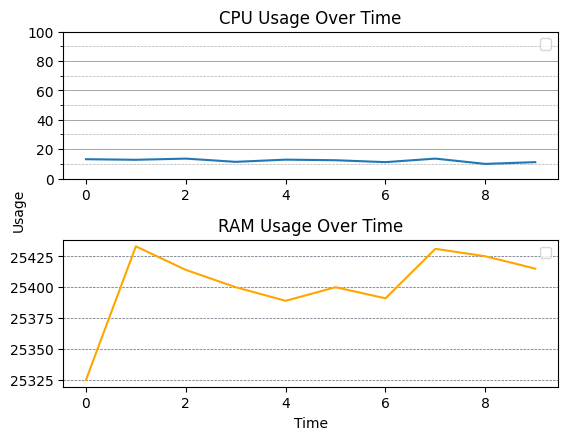

In [28]:
record = record_performance()
ctgan.fit(ctgan_data, ctgan_data.columns)
get_performance_report(record, 'performance.png')
